In [69]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets.mnist import load_data
from tqdm import tqdm

import sys
import os

module_path = os.path.join(os.getcwd(), '../modules')
sys.path.append(module_path)
from mlp import MLP, CompoundNN
from activation_functions import ReLU, LogSoftmax
from losses import MSELoss, NLLLoss
from optimizers import Optimizer

In [70]:
(trainX, trainY), (testX, testY) = load_data()

# Pré processamento
trainX = trainX / 255.0
testX = testX / 255.0

trainX = trainX.reshape(trainX.shape[0], 28 * 28)

# plt.imshow(trainX[0].reshape(28, 28), cmap='gray')
# int(trainY[0])

In [71]:
print(testX.min(), testX.max())

0.0 1.0


In [72]:
mlp1 = MLP(28*28, 512)
relu1 = ReLU()
mlp2 = MLP(512, 128)
relu2 = ReLU()
mlp3 = MLP(128, 64)
relu3 = ReLU()
mlp4 = MLP(64, 10)
s = LogSoftmax()

nn = CompoundNN([mlp1, relu1, mlp2, relu2, mlp3, relu3, mlp4, s])

optimizer = Optimizer(nn, 1e-3)
batch_size = 128

In [73]:
NB_EPOCHS = 14_000

training_loss = []
for epoch in tqdm(range(NB_EPOCHS)):
        loss_fct = NLLLoss() # nll loss usada para classificação

        idx = [np.random.randint(0, trainX.shape[0]) for _ in range(batch_size)]
        x = trainX[idx]
        target = trainY[idx]

        # Forward pass
        prediction = nn.forward(x)
        loss_value = loss_fct.forward(prediction, target) # compute loss
        training_loss.append(loss_value)
        gradout = loss_fct.backward() # compute gradient
        nn.backward(gradout)

        # update weights
        optimizer.step()



100%|██████████| 14000/14000 [04:15<00:00, 54.78it/s]


In [74]:
accuracy = 0

for i in range(testX.shape[0]):
    prediction = nn.forward(testX[i].reshape(1, 28*28)).argmax()
    if prediction == testY[i]:
        accuracy += 1
    else:
        pass

print(testX.shape[0])
print(accuracy)
print(f"Accuracy: {accuracy / testX.shape[0] * 100}%")

10000
1135
Accuracy: 11.35%


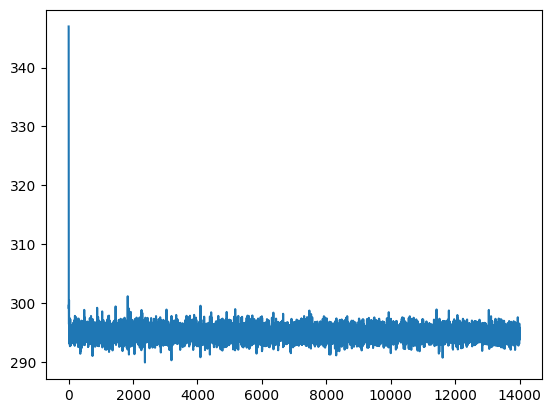

In [75]:
plt.plot(training_loss)